<a href="https://colab.research.google.com/github/tancse/Machine_Learning/blob/main/Basics_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression
*  type of Regression algorithm,
*  it gives continuous values as output,
*   Most simple and widely used algorithm in SL,
*   used to understand the relationship between a dependent variable and one or more independent variables.


*   The relationship between the dependent and independent variable is represented by linear equation:
*    y = mx +b
*   where
*   y - dependent variable
*   x - independent variable
*   m - slope value
*   b - intercept.



In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


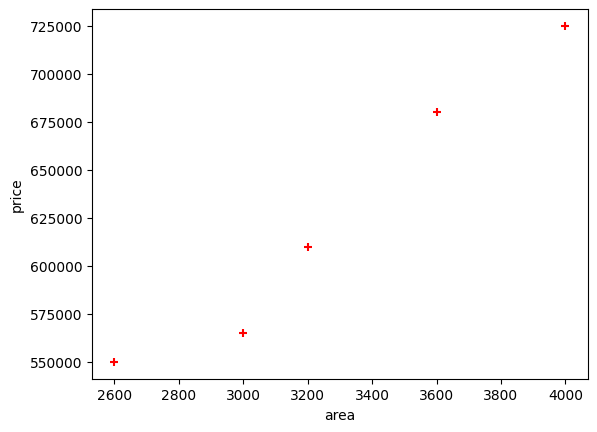

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [ ]:
area = df[['area']]
price = df.price
print(area)
print(price)
print(type(area),type(price))

   area
0  2600
1  3000
2  3200
3  3600
4  4000
0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [ ]:
model = linear_model.LinearRegression()
model.fit(area,price)

LinearRegression()

In [ ]:
model.predict([[4500]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([791660.95890411])

In [ ]:
m = model.coef_
b = model.intercept_
print(m,b)

[135.78767123] 180616.43835616432


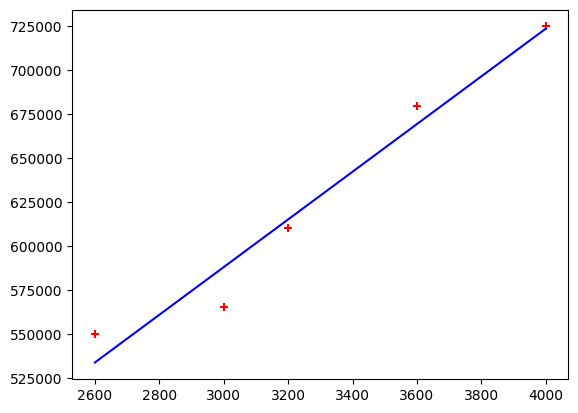

In [ ]:
plt.scatter(area, price, color='red', marker='+')

plt.plot(area, m * area + b , color='blue')

plt.show()

In [ ]:
model.predict([[3376]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([639035.61643836])

#Logistic Regression

*    Logistic regression is a type of supervised learning classification algorithm that is used to predict a binary output variable.
*   binar outpu variable - like yes/no, true/false, 0/1
*   not only binary also multiple output variable can be done
*    for binary classification where we use **sigmoid function**, that takes input as independent variables and produces a probability value between 0 and 1.

#Sigmoid Function
*   The sigmoid function is a mathematical function used to map the predicted values to probabilities.


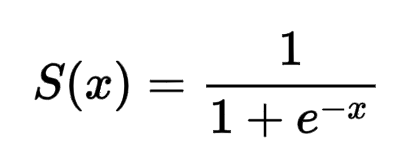
*    where e is Euler's number (~2.71828)



*   the sigmoid function will return the value in between 0 and 1 based on that value <0.5 --> round off to 0 or >0.5 -->round off to 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [ ]:
age = df.age
ins = df.bought_insurance
print(age)
print(ins)

0     22
1     25
2     47
3     52
4     46
5     56
6     55
7     60
8     62
9     61
10    18
11    28
12    27
13    29
14    49
15    55
16    25
17    58
18    19
19    18
20    21
21    26
22    40
23    45
24    50
25    54
26    23
Name: age, dtype: int64
0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    1
15    1
16    1
17    1
18    0
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    0
Name: bought_insurance, dtype: int64


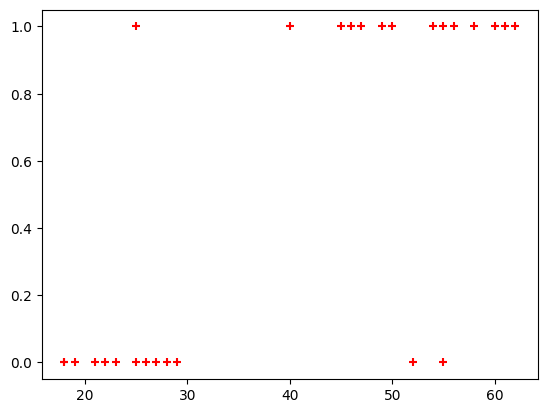

In [ ]:
plt.scatter(df.age,df.bought_insurance,color='red',marker='+')

In [ ]:
#splitting the dataset as training and testing
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
X_test

,age
3,52
25,54
18,19
7,60
11,28
17,58


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pre = model.predict(X_test)
y_pre

array([1, 1, 0, 1, 0, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.0868767 , 0.9131233 ],
       [0.06590856, 0.93409144],
       [0.92955547, 0.07044453],
       [0.02797471, 0.97202529],
       [0.77464336, 0.22535664],
       [0.03735723, 0.96264277]])

In [ ]:
model.score(X_test,y_test)

0.8333333333333334

In [ ]:
test = model.predict([[10]])
test

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.coef_

array([[0.14946248]])

In [ ]:
model.intercept_

array([-5.41966804])

In [ ]:
#sigmoid curve
import math
def sigmoid(z):
  return 1 / (1+math.exp(-z))

def prediction(age):
  z = 0.15 * age -5.42
  w = sigmoid(z)
  return w

age = int(input("Enter the age: "))
print(prediction(age))

Enter the age: 35
0.45760205922564895
